# Run some tracking tests 

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set(style='white')
%config InlineBackend.figure_format = 'retina'

## Have a look at the output .csv

In [2]:
csv_fname = r"C:\DATA_TEMP\scanimage\59987\13042018_pretrain\pretrain_0001.csv"
csv_fname = "/".join(csv_fname.split("\\"))

In [3]:
tracking = pd.read_csv(csv_fname,header = 3)

In [4]:
tracking.head(2)

frame    cam_timestamp    sys_timestamp  green_x  green_y    red_x   red_y
0      1  470509919211402  470526429866533  300.286  58.5000  290.875  34.125
1      2  470509944211890  470526592011310  294.769  58.3846  285.125  33.875

In [5]:
len(tracking)

60809

We get a **cam_timestamp** and **sys_timestamp** out. The cam_timestamp is the actual frame timestamp for every acquired frame. The sys_timestamp is the timestamp of every processing loop (for every grabbed frame). So the sys_timestamp reflects the actual processing time for every frame. That has a lot of jitter depending on how well your computer can cope with the incoming data.  

In [6]:
tracking["difference"] = np.append(0,np.diff(tracking.cam_timestamp))
tracking["difference_sys"] = np.append(0,np.diff(tracking.sys_timestamp))

In [7]:
tracking["difference_sec"] = tracking["difference"]/1000000000 # Gigaherz clock!
tracking["difference_sys_sec"] = tracking["difference_sys"]/1000000000

In [8]:
tracking.head(10)

frame    cam_timestamp    sys_timestamp  green_x  green_y    red_x  \
0      1  470509919211402  470526429866533  300.286  58.5000  290.875   
1      2  470509944211890  470526592011310  294.769  58.3846  285.125   
2      3  470509969212756  470526606662686  289.667  58.6667  280.875   
3      4  470509994213568  470526623335796  286.000  60.0000  277.500   
4      5  470510019214380  470526639010156  282.500  59.6667  275.000   
5      6  470510044215165  470526654710177  278.500  59.6667  271.833   
6      7  470510069216004  470526669698555  274.500  59.6667  269.000   
7      8  470510094216816  470526685500361  271.500  58.5000  264.286   
8      9  470510119217655  470526701186126  269.500  56.5000  260.000   
9     10  470510144218467  470526717849827  265.250  56.1250  255.909   

     red_y  difference  difference_sys  difference_sec  difference_sys_sec  
0  34.1250           0               0        0.000000            0.000000  
1  33.8750    25000488       162144777        0.025000            0.162145  
2  34.1250    25000866        14651376        0.025001            0.014651  
3  34.5000    25000812        16673110        0.025001            0.016673  
4  34.2857    25000812        15674360        0.025001            0.015674  
5  34.1667    25000785        15700021        0.025001            0.015700  
6  34.5000    25000839        14988378        0.025001            0.014988  
7  33.4286    25000812        15801806        0.025001            0.015802  
8  31.2500    25000839        15685765        0.025001            0.015686  
9  31.0909    25000812        16663701        0.025001            0.016664

### Plot cam_timestamp and sys_timestamp differences

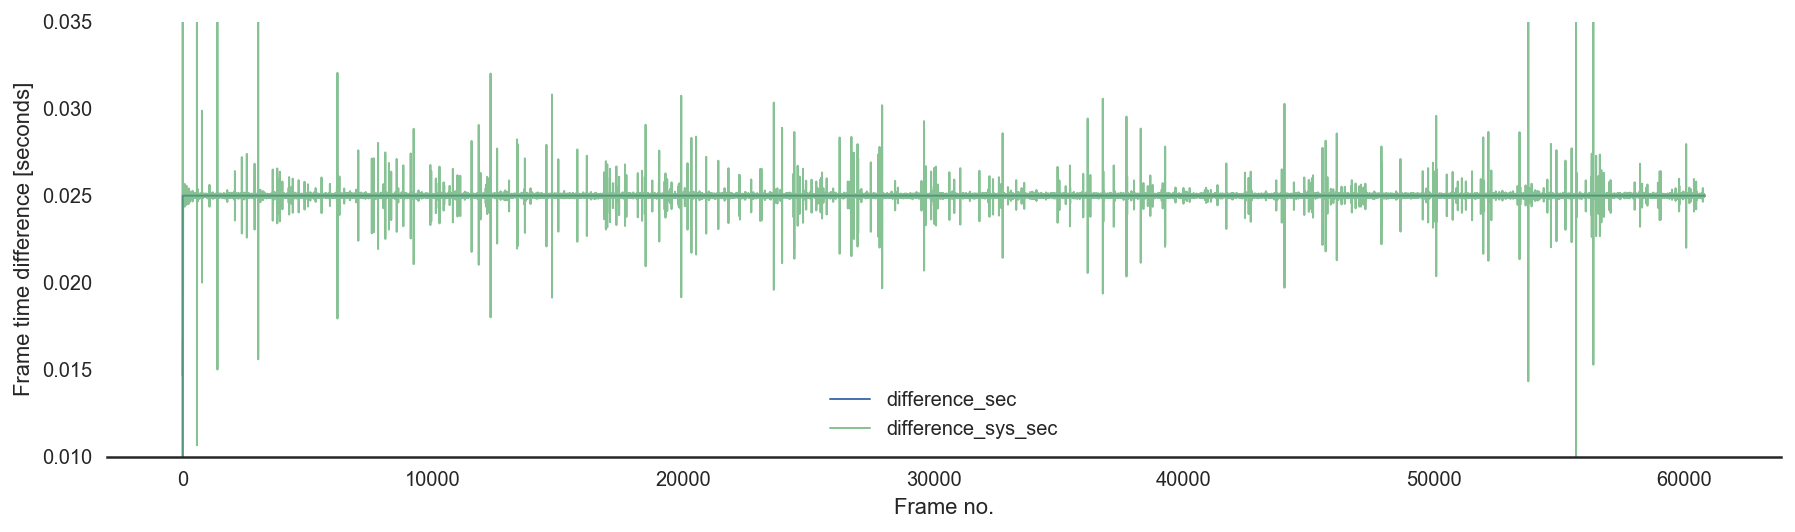

In [9]:
figure = plt.figure(figsize=(15,4))
ax = figure.add_subplot(111)
ax.plot(tracking.difference_sec,lw=1,label="difference_sec")
ax.plot(tracking.difference_sys_sec,lw=1,label="difference_sys_sec",alpha=.7)
#ax.axhline(y=0.025,lw=1,color='r')
#ax.set_xlim(0,240)
ax.set_ylim(0.01,0.035)
ax.set_ylabel("Frame time difference [seconds]")
ax.set_xlabel("Frame no.")
plt.legend()
sns.despine(left=True)
plt.show();

### ... zoom in 

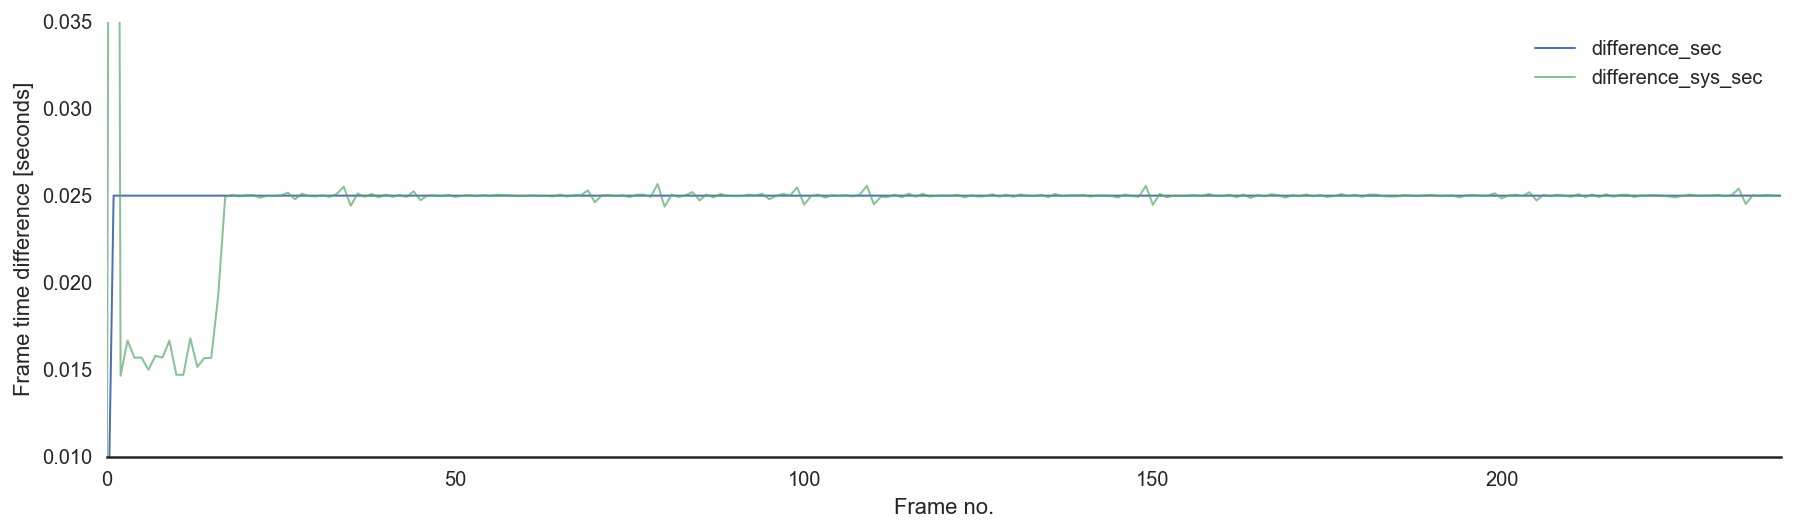

In [10]:
figure = plt.figure(figsize=(15,4))
ax = figure.add_subplot(111)
ax.plot(tracking.difference_sec,lw=1,label="difference_sec")
ax.plot(tracking.difference_sys_sec,lw=1,label="difference_sys_sec",alpha=.7)
#ax.axhline(y=0.025,lw=1,color='r')
ax.set_xlim(0,240)
ax.set_ylim(0.01,0.035)
ax.set_ylabel("Frame time difference [seconds]")
ax.set_xlabel("Frame no.")
plt.legend()
sns.despine(left=True)
plt.show();

The processor needs some time at the start to "get going", but then catches up on my machine.

In [11]:
tracking.describe()

frame  cam_timestamp  sys_timestamp       green_x       green_y  \
count  60809.000000   6.080900e+04   6.080900e+04  60809.000000  60809.000000   
mean   30405.000000   4.712700e+14   4.712865e+14    263.721349    268.507943   
std    17554.190597   4.388690e+11   4.388628e+11    111.030823    125.637884   
min        1.000000   4.705099e+14   4.705264e+14      0.000000      0.000000   
25%    15203.000000   4.708900e+14   4.709065e+14    183.600000    174.000000   
50%    30405.000000   4.712700e+14   4.712865e+14    257.333000    277.667000   
75%    45607.000000   4.716501e+14   4.716666e+14    348.600000    381.667000   
max    60809.000000   4.720302e+14   4.720467e+14    491.000000    464.000000   

              red_x         red_y    difference  difference_sys  \
count  60809.000000  60809.000000  6.080900e+04    6.080900e+04   
mean     257.839651    264.776997  2.500040e+07    2.500005e+07   
std      112.015912    123.698541  1.013842e+05    6.847007e+05   
min        0.000000      0.000000  0.000000e+00    0.000000e+00   
25%      175.000000    167.000000  2.500078e+07    2.495877e+07   
50%      246.750000    279.167000  2.500081e+07    2.500154e+07   
75%      336.500000    372.500000  2.500084e+07    2.504231e+07   
max      477.000000    452.500000  2.500087e+07    1.621448e+08   

       difference_sec  difference_sys_sec  
count    60809.000000        60809.000000  
mean         0.025000            0.025000  
std          0.000101            0.000685  
min          0.000000            0.000000  
25%          0.025001            0.024959  
50%          0.025001            0.025002  
75%          0.025001            0.025042  
max          0.025001            0.162145

In [12]:
# how long? 
duration_minutes = np.cumsum(tracking.difference_sec).values[-1]/60
print('Recording is {:.1f} min long'.format(duration_minutes))

Recording is 25.3 min long


## Plot trace

This needs filtering for (0,0) values for either LED. If both coordinates of one LED are zero the likelihood that tracing was unsuccessful is very high (0,0 is the default value).

In [13]:
tracking.columns

Index(['frame', 'cam_timestamp', 'sys_timestamp', 'green_x', 'green_y',
       'red_x', 'red_y', 'difference', 'difference_sys', 'difference_sec',
       'difference_sys_sec'],
      dtype='object')

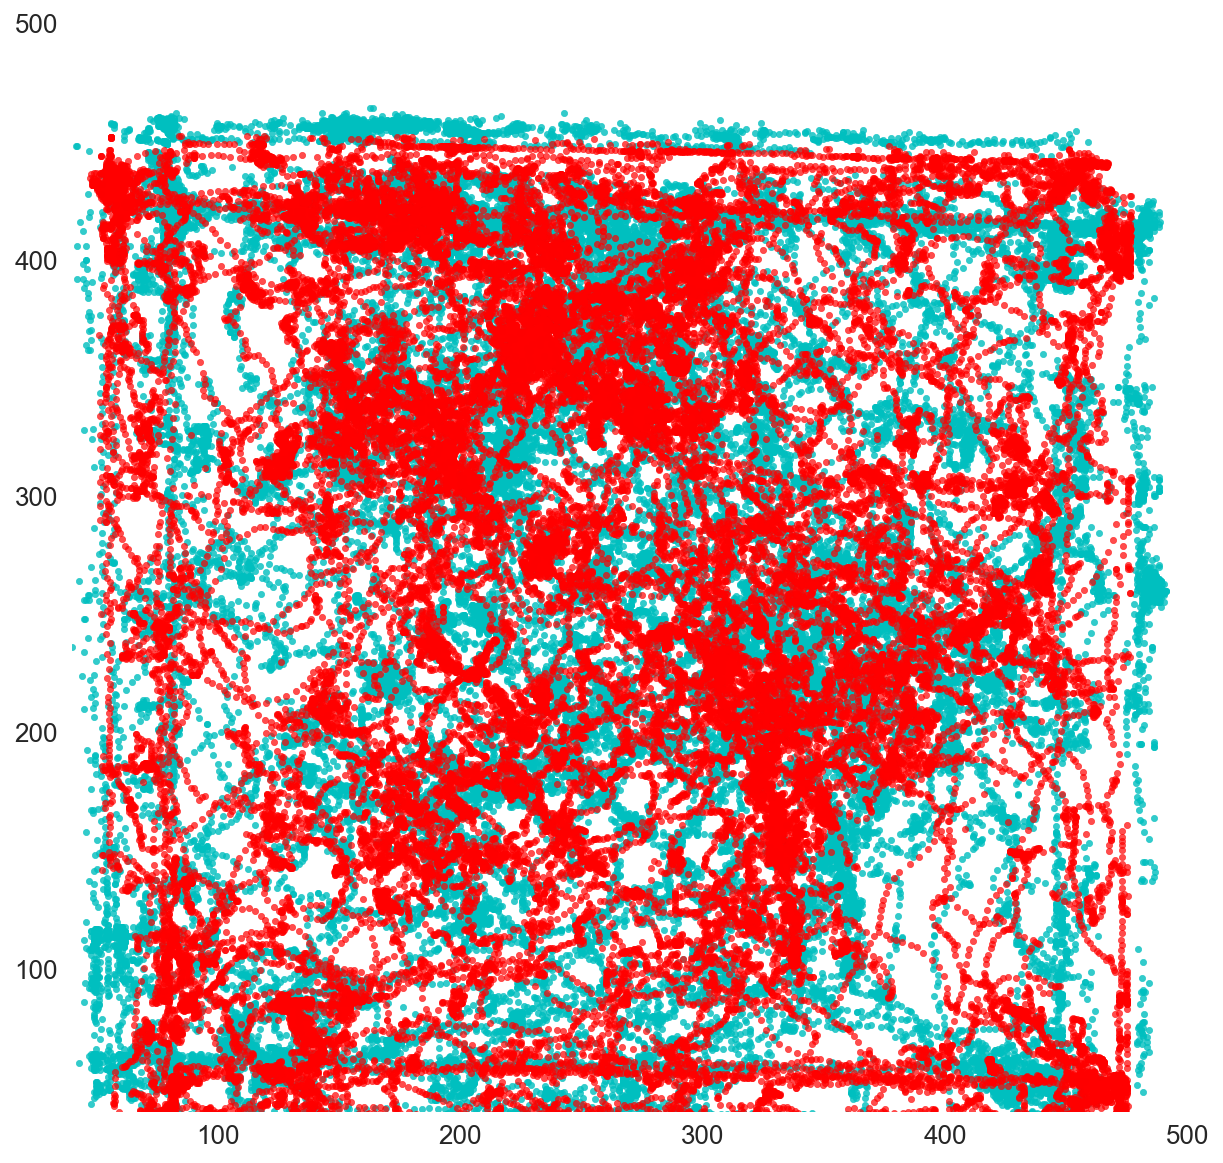

In [14]:
sns.set(font_scale=1.3,style="white")
figure = plt.figure(figsize=(10,10))
ax = figure.add_subplot(111)
ax.scatter(tracking.green_x,tracking.green_y,c='c',s=10,alpha=.8)
ax.scatter(tracking.red_x,tracking.red_y,c='r',s=10,alpha=.7)
ax.set_xlim(40,500)
ax.set_ylim(40,500)
sns.despine(left=True,bottom=True)
plt.show()

### Smooth path and plot again

In [15]:
from scipy.ndimage.filters import gaussian_filter1d

In [16]:
tracking_filt = tracking[(tracking.T != 0).all()]

In [17]:
green_x_filt = gaussian_filter1d(tracking_filt.green_x,3.5)
green_y_filt = gaussian_filter1d(tracking_filt.green_y,3.5)

red_x_filt = gaussian_filter1d(tracking_filt.red_x,2)
red_y_filt = gaussian_filter1d(tracking_filt.red_y,2)

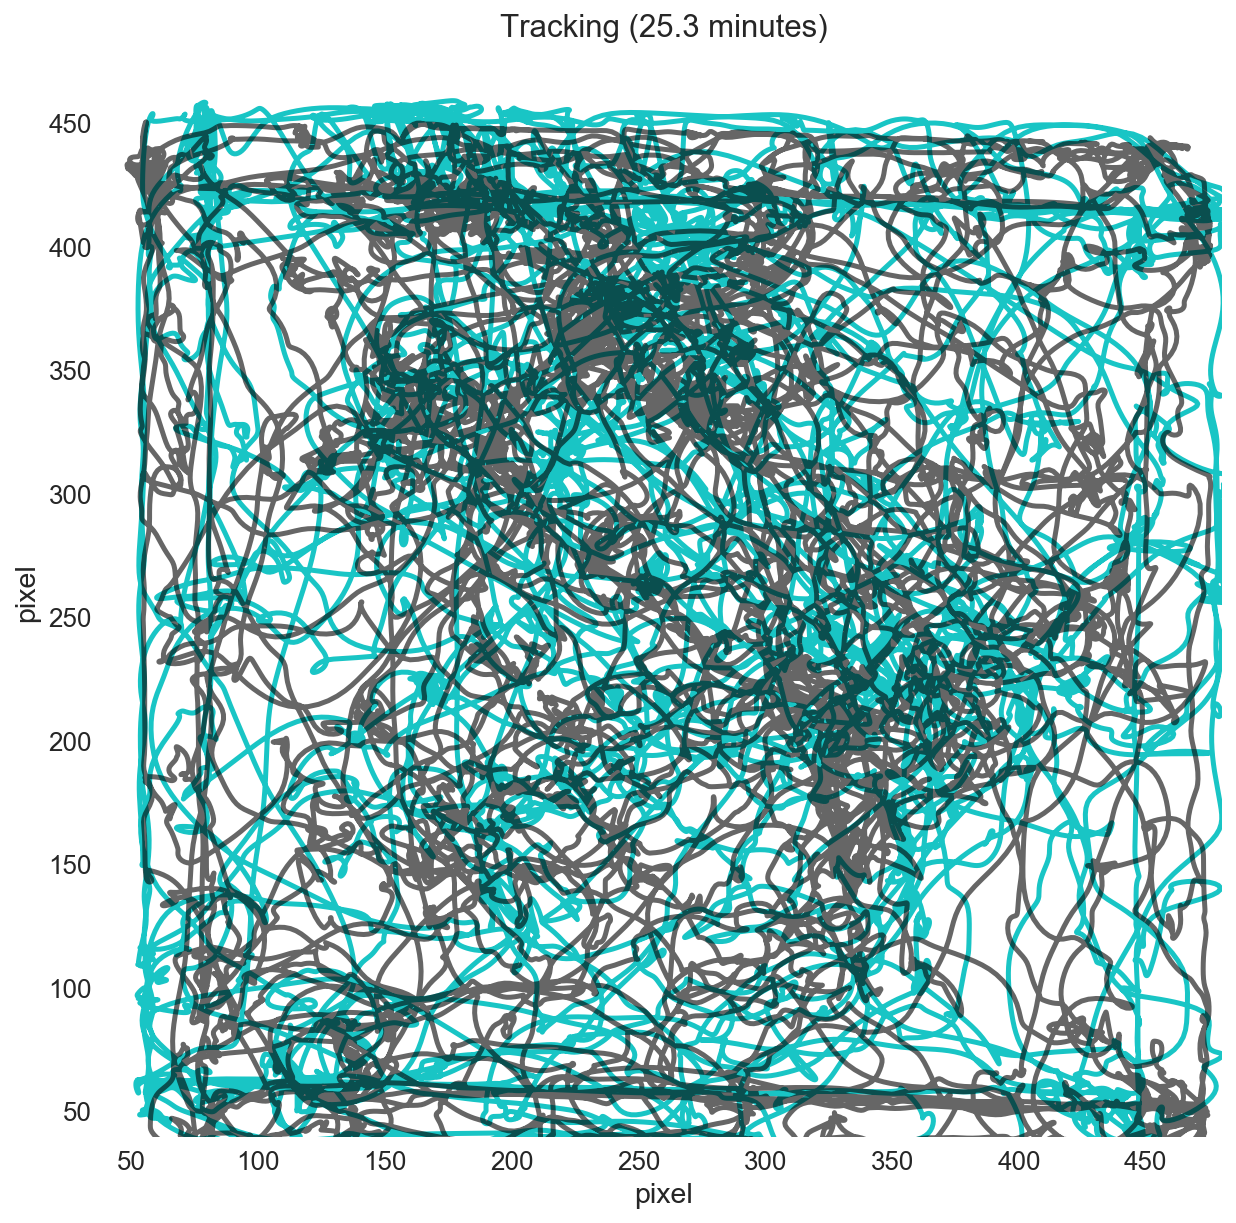

In [18]:
sns.set(font_scale=1.3,style="white")
figure = plt.figure(figsize=(10,10))
ax = figure.add_subplot(111)
ax.plot(green_x_filt,green_y_filt,c='c',lw=2.5,alpha=.9)
ax.plot(red_x_filt,red_y_filt,c='k',lw=2.5,alpha=.6)
ax.set_xlim(40,480)
ax.set_ylim(40,480)

ax.set_title('Tracking ({:.1f} minutes)'.format(duration_minutes))
ax.set_ylabel('pixel');ax.set_xlabel('pixel');

sns.despine(left=True,bottom=True)
plt.show()

### Take mean over coordinates and filter

In [19]:
tracking_filt['avg_x'] = tracking_filt[['green_x', 'red_x']].mean(axis=1)
tracking_filt['avg_y'] = tracking_filt[['green_y', 'red_y']].mean(axis=1)

C:\Users\horsto\AppData\Local\conda\conda\envs\ms\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\horsto\AppData\Local\conda\conda\envs\ms\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [20]:
average_x = gaussian_filter1d(tracking_filt.avg_x,3.5)
average_y = gaussian_filter1d(tracking_filt.avg_y,3.5)

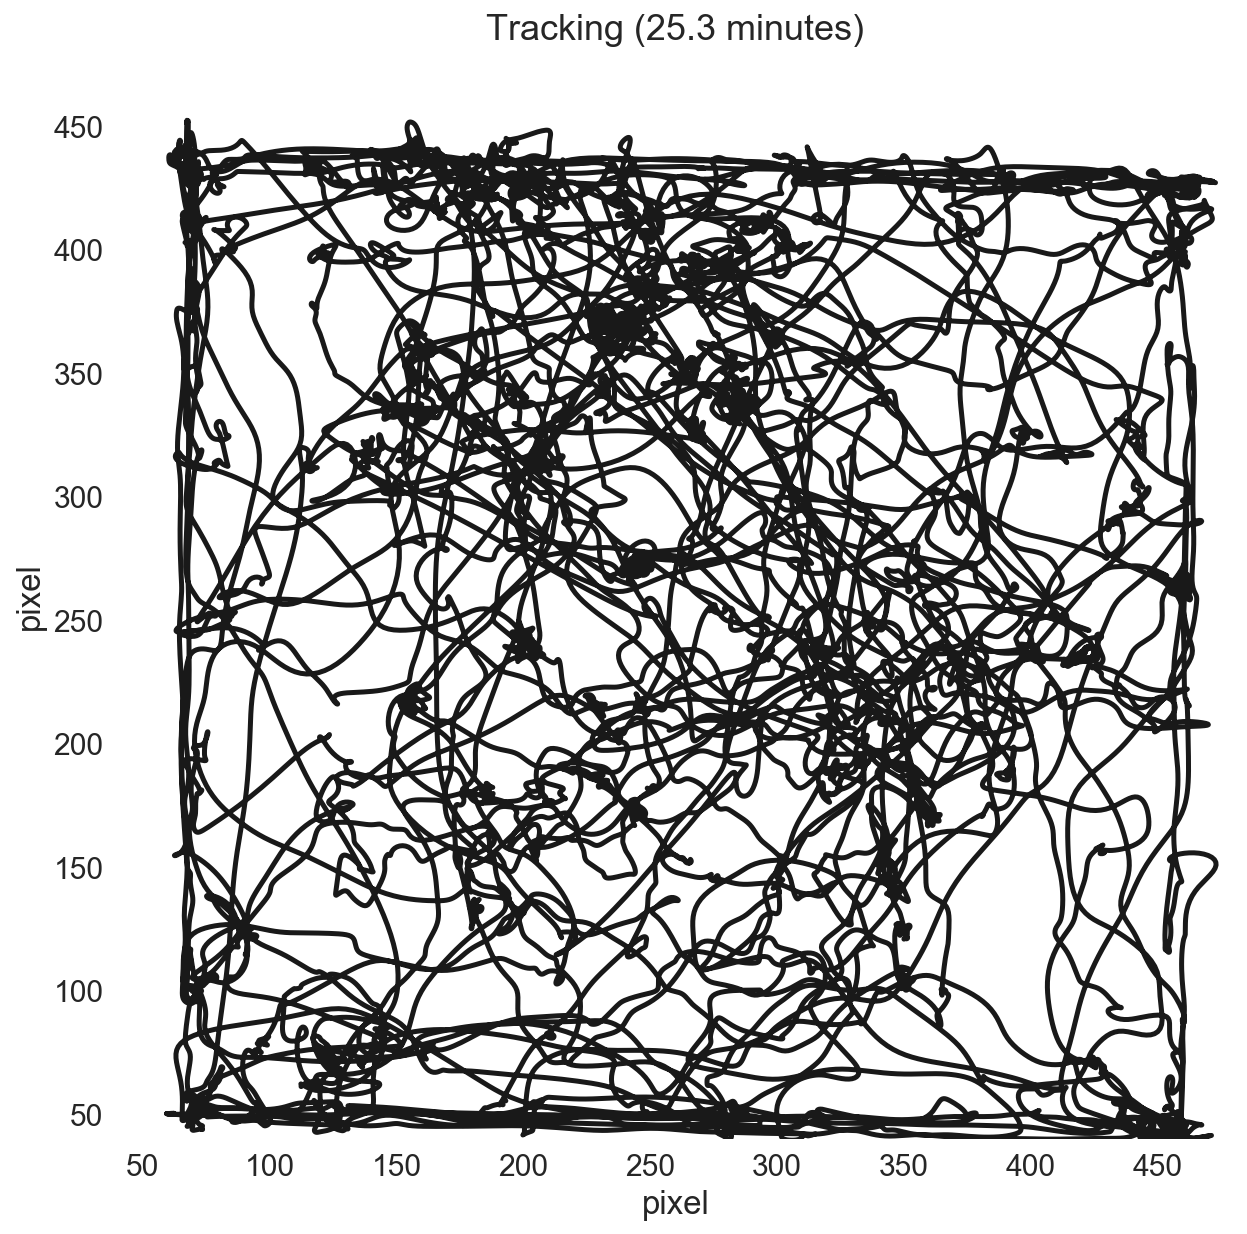

In [21]:
sns.set(font_scale=1.5,style="white")
figure = plt.figure(figsize=(10,10))
ax = figure.add_subplot(111)
ax.plot(average_x,average_y,c='k',lw=2.5,alpha=.9)
ax.set_xlim(40,480)
ax.set_ylim(40,480)

ax.set_title('Tracking ({:.1f} minutes)'.format(duration_minutes))
ax.set_ylabel('pixel');ax.set_xlabel('pixel');

sns.despine(left=True,bottom=True)
plt.show()